<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Кодирование-признаков" data-toc-modified-id="Кодирование-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Кодирование признаков</a></span></li><li><span><a href="#Разделение-выборки" data-toc-modified-id="Разделение-выборки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Разделение выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Построение-модели-решающего-дерева" data-toc-modified-id="Построение-модели-решающего-дерева-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Построение модели решающего дерева</a></span></li><li><span><a href="#Построение-модели-случайного-леса" data-toc-modified-id="Построение-модели-случайного-леса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Построение модели случайного леса</a></span></li><li><span><a href="#Построение-модели-логистической-регрессии" data-toc-modified-id="Построение-модели-логистической-регрессии-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Построение модели логистической регрессии</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Изменение-порогов" data-toc-modified-id="Изменение-порогов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порогов</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Оценим-важность-фичей" data-toc-modified-id="Оценим-важность-фичей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Оценим важность фичей</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов банка

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры и довести метрику до 0.59. 

Дополнительно измерим *AUC-ROC* и сравним её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Загрузка данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Энкодеры
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
#Разделение и смешение выборок
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#Модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.dummy import DummyClassifier #для случайной модели
#Метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve 
import warnings

Файл с данными был предварительно скачан по ссылке, разархивирован и загружен на сервер в папку с ноутбуком. Далее прочитаем данные и загрузим их в датафрейм.

In [2]:
try:
    data = pd.read_csv('...')
except:
    data = pd.read_csv('...')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Имеем таблицу со следующими данными:
Признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак:
- Exited — факт ухода клиента

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Что видим по данным:
- пропусков нет
- типы данных соответствуют содержащимся данным
- наименования колонок желательно поправить (привести к "змеиному" формату)
- так как при загруке в датафрейм у нас появились собственные индексы, то поле RowNumber нам не потребуется (тем более оно не несет никакого бизнес-смысла в рамках исследуемой задачи). Также не имеет смысла брать в анализ поля CustomerId и Surname - вероятнее всего, они уникальны для каждого пользователя и не могут определять удовлетворенность клиента относительно сервисов банка. Удалим эти поля.

In [4]:
data = data.drop(['RowNumber'],axis=1)
data.columns = ['customer_id', 'surname', 'credit_score','geography','gender','age','tenure', \
                'balance','num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            10000 non-null  int64  
 7   balance           10000 non-null  float64
 8   num_of_products   10000 non-null  int64  
 9   has_cr_card       10000 non-null  int64  
 10  is_active_member  10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  exited            10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Перед удалением полей 'customer_id', 'surname' проверим таблицу на полные дубликаты, а также на дубликаты по полю customer_id (так как оно ключевое по смыслу).

In [5]:
print(data.duplicated().sum())
print(data.duplicated(['customer_id']).sum())

0
0


Дубликатов в таблице нет. Проверять на дубликаты по Фамилии нет смысла - такие данные могут быть и это нормально, однако, Фамилию (в отличие от пола/возраста и других данных клиента) нельзя относести к харатерным признакам, по которым можно собрать хоть сколько-нибудь большие группы клиентов. Так что это поле в анализе бессмысленно.  Удалим 'customer_id' и 'surname'. 

In [6]:
data = data.drop(['customer_id','surname'],axis=1)
data.head(5)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Данные загружены и прошли первичную обработку. Рассмотрим их более подробно с точки зрения бизнес-смысла.

### Исследовательский анализ данных

Изучим имеющиеся данные.
Для этого:
- проанализируем общую долю ушедших и оставшихся клиентов
- построим матрицу корреляций

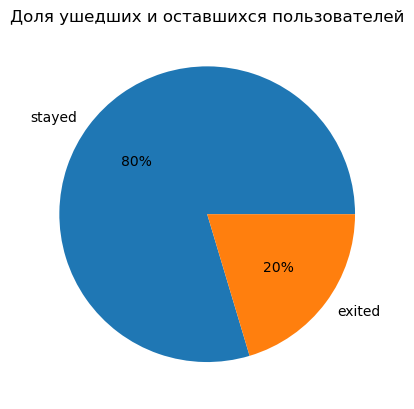

In [7]:
exited_share = data.groupby(by='exited').count()
labels = ['stayed','exited']
plt.pie(data=exited_share, labels=labels, x=exited_share['credit_score'], autopct='%.0f%%')
plt.title('Доля ушедших и оставшихся пользователей')
plt.show()

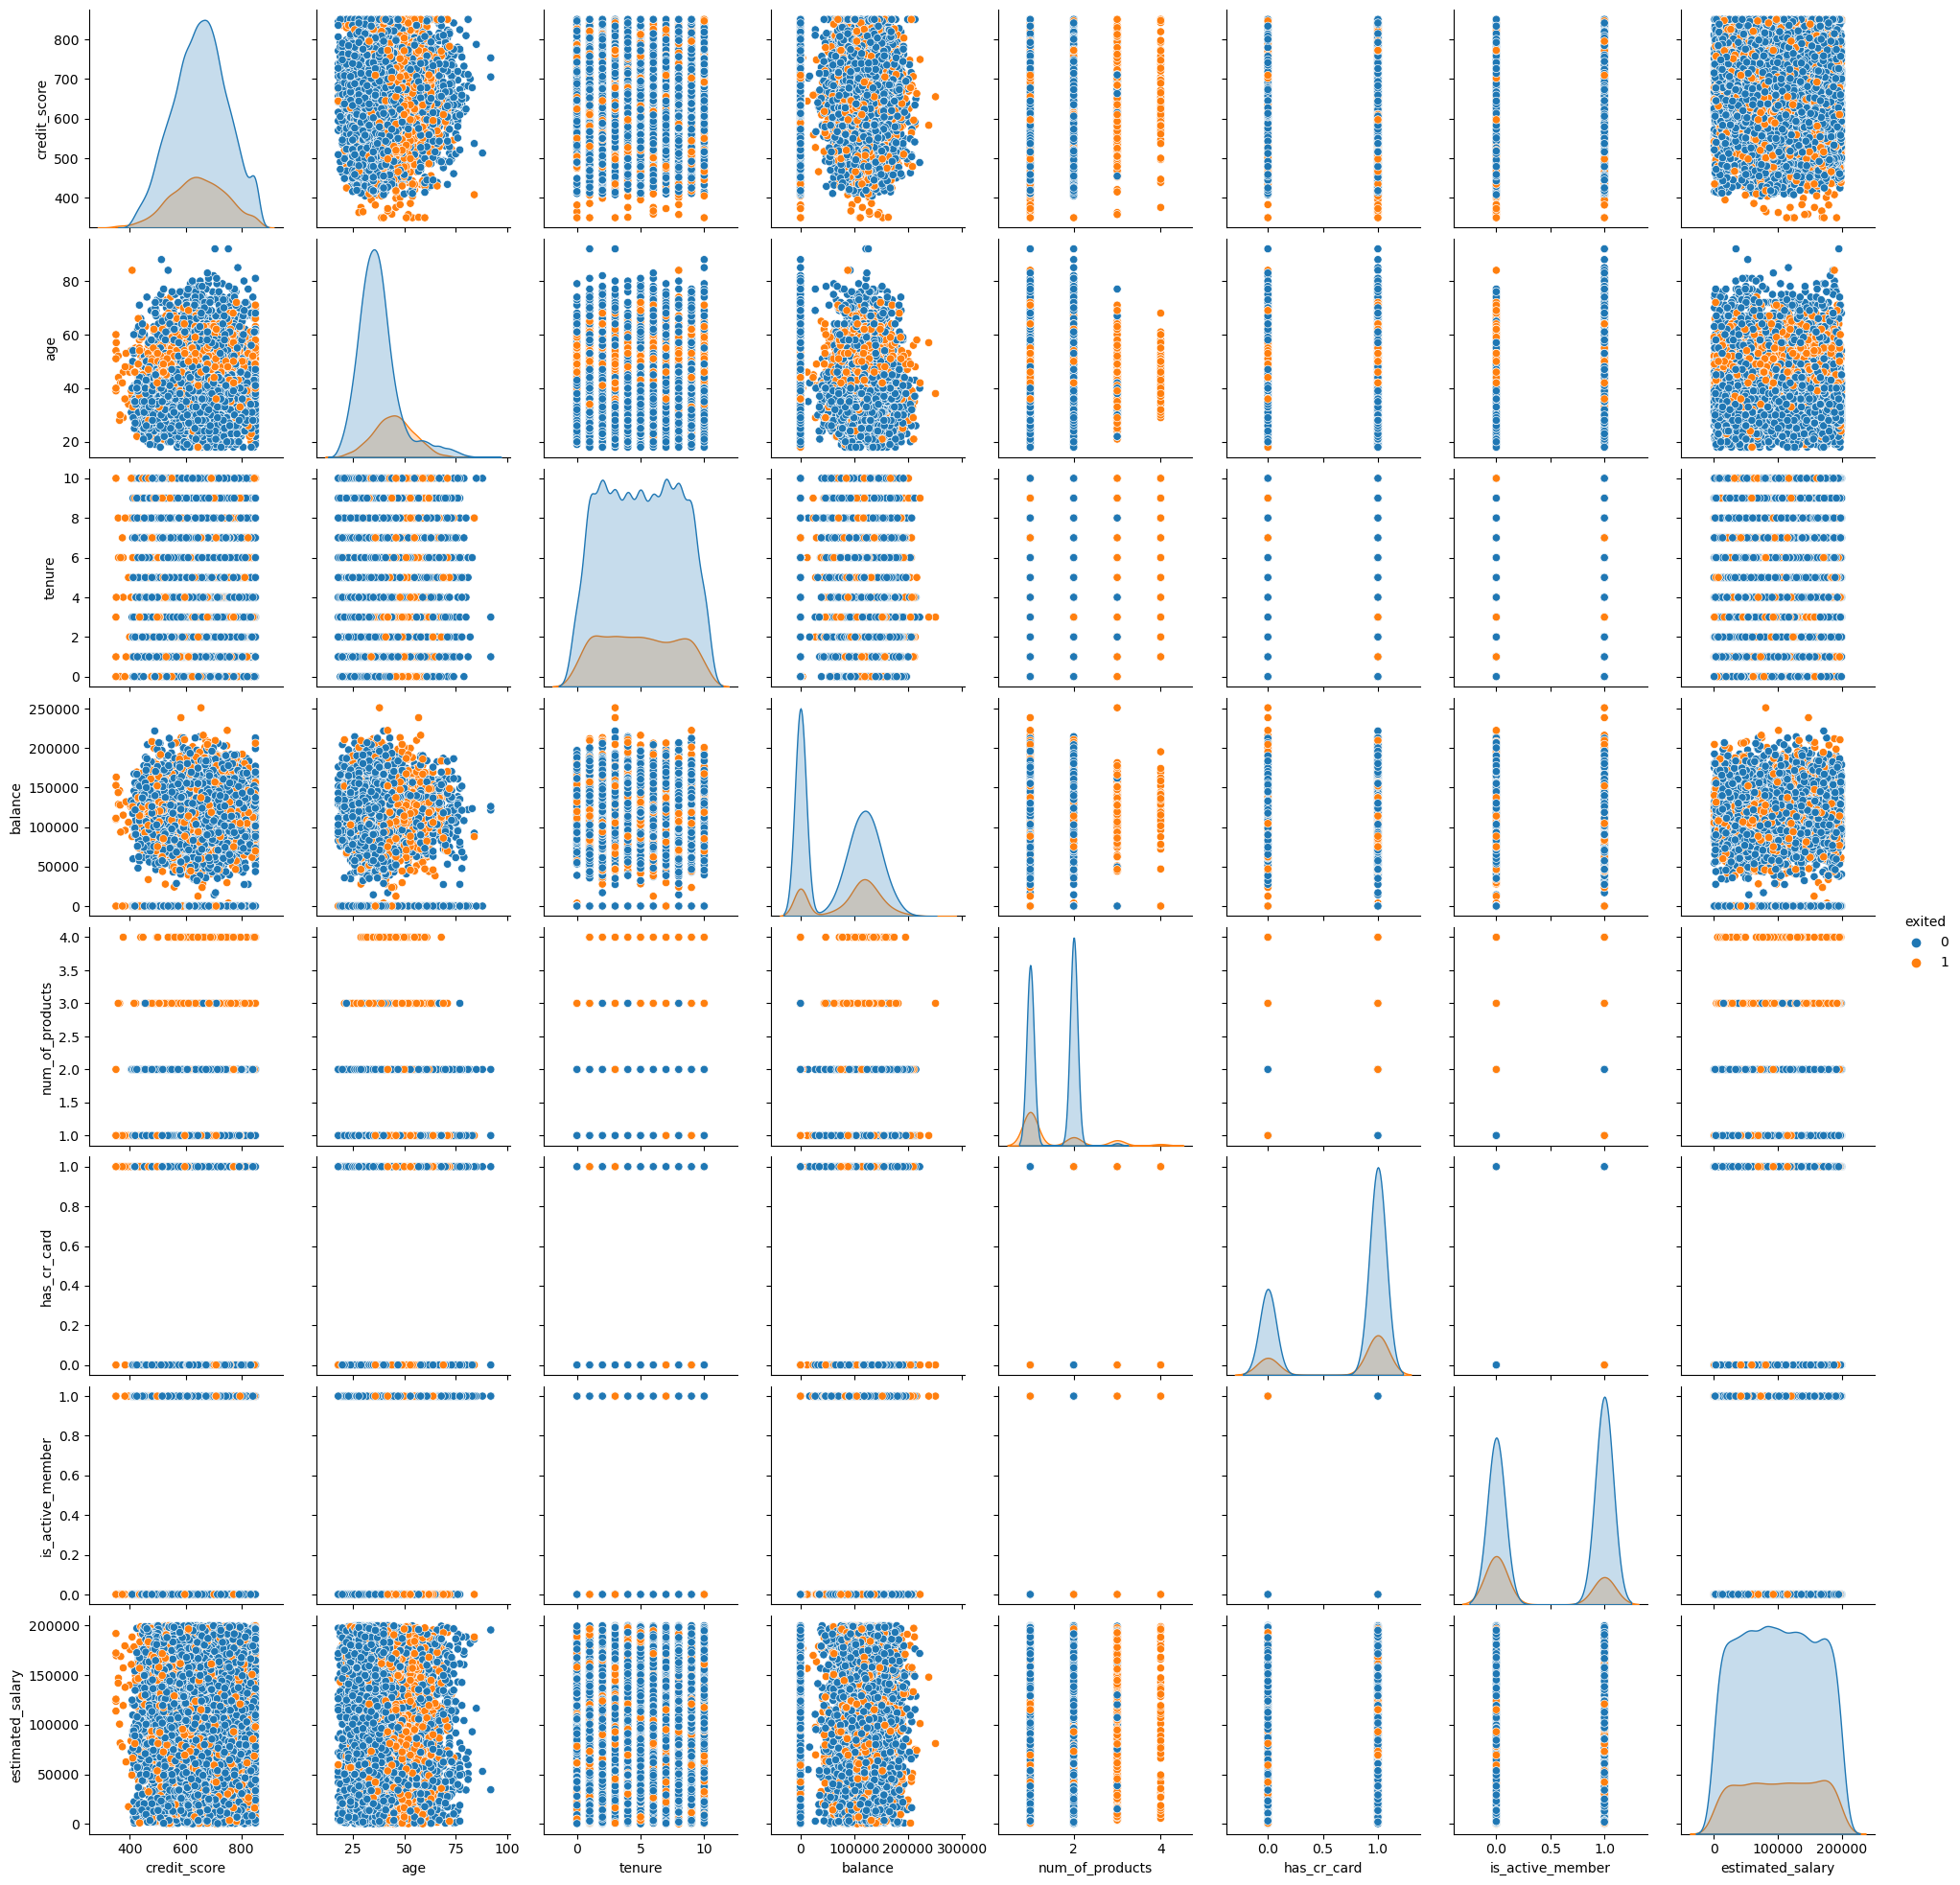

In [8]:

warnings.filterwarnings("ignore")
sns.pairplot(data, hue = 'exited')
plt.show()

**Вывод**:
- корреляции между различными признаками/feature в данных не наблюдается. Но можно отследить некоторые корреляции к целевому признаку (оранжевым-ушедшие клиенты).
- количество ушедших клиентов в 4 раза меньше (20% и 80%), чем оставшихся - явно есть дисбаланс классов.
- чаще всего уходят клиенты в возрасте от 40 до 60 лет
- чаще всего уходят клиенты, имеющие 3-4 продукта (с 4 продуктами ушли практически все клиенты, судя по графикам)
- уход клиентов напрямую не коррелирует с наличием кредитной карты, сроком обслуживания в банке, балансом или зарплатой. С кредитным рейтингом в целом корреляция не наблюдается, однако клиенты с рейтингом меньше 400, как правило, уходят.

### Кодирование признаков

Закодируем категориальные признаки методом прямого кодирования (One Hot Encoding) - этот метод кодирования (в отличие от OrdinalEncoding) подходит и для деревьев/леса и для логистической регрессии.
<br> Во избежание дамми-ловушки для каждого поля исключим первую категорию (drop_first=True).

In [9]:
#geography, gender, has_cr_card, is_active_member
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head(5)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


Указанные столбцы преобразовались.

### Разделение выборки

Разделим набор данных на обучающую, валидационную и тестовую выборки (в соотношении 60/20/20).
<br>Определим фичи и таргет.

In [10]:
data_train, data_valid_test = train_test_split(data_ohe, test_size=0.4, random_state=12345) #отделим тестовую выборку
data_valid, data_test = train_test_split(data_valid_test, test_size=0.5, random_state=12345)  #отделим вылибационную выборку

features_train = data_train.drop(['exited'], axis=1)
target_train = data_train['exited']
features_valid = data_valid.drop(['exited'], axis=1)
target_valid = data_valid['exited']
features_test = data_test.drop(['exited'], axis=1)
target_test = data_test['exited']

print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


Данные разделены, количество строк и столбцов в наборах данных верное.

### Масштабирование признаков

In [11]:
pd.options.mode.chained_assignment = None
numeric = ['credit_score', 'age', 'tenure', 'balance','num_of_products','estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
(print(features_train.head(5)))
(print(features_valid.head(5)))

      credit_score       age    tenure   balance  num_of_products  \
7479     -0.886751 -0.373192  1.027273  1.232271        -0.891560   
3411      0.608663 -0.183385  1.027273  0.600563        -0.891560   
6027      2.052152  0.480939 -0.707790  1.027098         0.830152   
1247     -1.457915 -1.417129  0.333248 -1.233163         0.830152   
3716      0.130961 -1.132419 -1.054802  1.140475        -0.891560   

      has_cr_card  is_active_member  estimated_salary  geography_Germany  \
7479            1                 0         -0.187705              False   
3411            0                 0         -0.333945              False   
6027            0                 1          1.503095               True   
1247            1                 0         -1.071061              False   
3716            0                 0          1.524268               True   

      geography_Spain  gender_Male  
7479             True         True  
3411            False        False  
6027            F

Необходимые столбцы корректно преобразовались. Перейдем к построениям моделей.

## Исследование задачи

### Построение модели решающего дерева

План:
- разработаем функцию для создания,валидации и анализа полученной модели решающего дерева
- обучим в цикле несколько моделей решающего дерева с раличными параметрами глубины, чтобы выбрать наиболее удачный вариант
- проанализируем полученные метрики качества по полученным моделям

In [12]:
def fit_calc_model_metrics (p_model, p_features_train, p_features_valid, p_target_train, p_target_valid):  
    ## Обучаем модель и предсказываем
    p_model.fit(p_features_train, p_target_train)
    predictions_valid = p_model.predict(p_features_valid)
    probabilities_valid = p_model.predict_proba(p_features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]     
    ## Считаем метрики и записываем в таблицу
    accuracy = accuracy_score(p_target_valid,predictions_valid)
    recall = recall_score(p_target_valid,predictions_valid)
    precision = precision_score(p_target_valid,predictions_valid)
    f1 = f1_score(p_target_valid,predictions_valid)
    roc_auc = roc_auc_score(p_target_valid,probabilities_one_valid)   
    return [accuracy,recall,precision,f1,roc_auc]

def create_analyze_dtc_model (p_features_train, p_features_valid, p_target_train, p_target_valid, p_depth=None, p_weighted=None, p_randomstate=12345):
    ## Создаем и именуем модель
    model_dtc = DecisionTreeClassifier(random_state=p_randomstate, max_depth=p_depth, class_weight=p_weighted )
    model_name = 'DTC'+'_depth'+str(p_depth)  
   
    return [model_name] + fit_calc_model_metrics(model_dtc, p_features_train, p_features_valid, p_target_train, p_target_valid)

#Проверим работоспособность функции:
create_analyze_dtc_model (features_train, features_valid, target_train, target_valid, p_depth=10)

['DTC_depth10',
 0.834,
 0.46411483253588515,
 0.6423841059602649,
 0.5388888888888889,
 0.7685300842613372]

Создадим датафрейм для хранения всех результатов по нашим моделям:

In [13]:
models_results = pd.DataFrame(columns=['model_type', 'balancing','threshold','model_name','accuracy','recall','precision','f1','roc_auc'])
models_results

,model_type,balancing,threshold,model_name,accuracy,recall,precision,f1,roc_auc


Рассчитаем в цикле разные варианты решающего дерева (с глубиной от 2 до 20), внесем их в таблицу и посмотрим, какие получаются результаты по метрикам.

In [14]:
#удалим предыдущие расчеты (если есть)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'DecisionTreeClassifier')&\
                                                   (models_results['balancing'] == 'None')&\
                                                   (models_results['threshold'] == 'None')].index)

for depth in range(2, 20):
    row = pd.DataFrame(['DecisionTreeClassifier','None','None'] + create_analyze_dtc_model(features_train, features_valid, target_train, target_valid, p_depth=depth) ) 
    row = row.T    
    row.columns = models_results.columns    
    models_results = pd.concat([models_results,row]).reset_index(drop=True)  
    

In [15]:
display(models_results.head(20).style.background_gradient(cmap='Blues', axis=0,subset=['accuracy','f1','recall','precision','roc_auc']))

,model_type,balancing,threshold,model_name,accuracy,recall,precision,f1,roc_auc
0,DecisionTreeClassifier,None,None,DTC_depth2,0.824000,0.459330,0.603774,0.521739,0.750181
1,DecisionTreeClassifier,None,None,DTC_depth3,0.838000,0.284689,0.826389,0.423488,0.797344
2,DecisionTreeClassifier,None,None,DTC_depth4,0.852000,0.437799,0.750000,0.552870,0.813428
3,DecisionTreeClassifier,None,None,DTC_depth5,0.853000,0.413876,0.779279,0.540625,0.822168
4,DecisionTreeClassifier,None,None,DTC_depth6,0.858000,0.449761,0.776860,0.569697,0.816463
5,DecisionTreeClassifier,None,None,DTC_depth7,0.850500,0.406699,0.769231,0.532081,0.815232
6,DecisionTreeClassifier,None,None,DTC_depth8,0.850500,0.425837,0.751055,0.543511,0.809057
7,DecisionTreeClassifier,None,None,DTC_depth9,0.852000,0.473684,0.722628,0.572254,0.783247
8,DecisionTreeClassifier,None,None,DTC_depth10,0.834000,0.464115,0.642384,0.538889,0.768530
9,DecisionTreeClassifier,None,None,DTC_depth11,0.817000,0.461722,0.577844,0.513298,0.732057


Видим, что наибольшее значение Accuracy выдала модель с глубиной дерева 6, Но! при этом наибольшая F1-мера получилась для дерева с глубиной 9 (хотя для глубины 6 она тоже хорошая).
<br>Также на графике хорошо видно, как противоположно направлены точность и полноста: с возрастанием глубины дерева растет полноста, но и падает точность. И как раз на глубине 9 (где можно сказать, что они "встречаются" по градиенту) достигает максимума метрика F1, т.к. F1 призвана контролировать обе эти метрики.
<br>И для глубины 6, и для глубины 9 показатели хорошие. Возьмем оба этих значения и будем тестировать по ним модели случайного леса. 

### Построение модели случайного леса

План:
- разработаем функцию для создания,валидации и анализа полученной модели случайного леса
- обучим в цикле несколько моделей случайного леса с раличными параметрами глубины, чтобы выбрать наиболее удачный вариант
- проанализируем полученные метрики качества по полученным моделям

In [16]:
def create_analyze_rfc_model (p_features_train, p_features_valid, p_target_train, p_target_valid, p_est, p_depth=None, p_weighted=None, p_randomstate=12345):
    ## Создаем и именуем модель
    model_rfc = RandomForestClassifier(random_state=p_randomstate, max_depth=p_depth, n_estimators=p_est, class_weight=p_weighted )
    model_name = 'RFC'+'_depth'+str(p_depth)+'_est'+str(p_est) 
    
    return [model_name] + fit_calc_model_metrics(model_rfc, p_features_train, p_features_valid, p_target_train, p_target_valid)


#Проверим работоспособность функции:
create_analyze_rfc_model (features_train, features_valid, target_train, target_valid, p_depth=6, p_est=10)

['RFC_depth6_est10',
 0.8595,
 0.39712918660287083,
 0.8512820512820513,
 0.5415986949429037,
 0.8395102801250915]

Рассчитаем в цикле разные варианты случайного леса (с n_estimators от 5 до 100 и глубиной деревьев 6 и 9), внесем их в таблицу и посмотрим, какие получаются результаты по метрикам.

In [17]:
#удалим предыдущие расчеты случайного леса(если есть)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'RandomForestClassifier')&\
                                                   (models_results['balancing'] == 'None')&\
                                                   (models_results['threshold'] == 'None')].index)

#посчитаем модели леса с разными параметрами
for depth in [6,9]:
    for est in range(5,100):
        row = pd.DataFrame(['RandomForestClassifier','None','None'] + create_analyze_rfc_model(features_train, features_valid, target_train, target_valid, p_depth=depth, p_est=est) ) 
        row = row.T
        row.columns = models_results.columns
        models_results = pd.concat([models_results,row]).reset_index(drop=True)  
        #models_results = models_results.append(row,ignore_index = True)

Посмотрим на полученные метрики. Для этого отсортируем таблицу по убыванию поля F1.

In [18]:
display(models_results.sort_values(by='f1',ascending=False).head(20).style.background_gradient(cmap='Blues', axis=0,subset=['accuracy','f1','recall','precision','roc_auc']))

,model_type,balancing,threshold,model_name,accuracy,recall,precision,f1,roc_auc
7,DecisionTreeClassifier,None,None,DTC_depth9,0.852000,0.473684,0.722628,0.572254,0.783247
191,RandomForestClassifier,None,None,RFC_depth9_est83,0.864500,0.430622,0.845070,0.570523,0.852275
200,RandomForestClassifier,None,None,RFC_depth9_est92,0.863500,0.433014,0.834101,0.570079,0.852609
4,DecisionTreeClassifier,None,None,DTC_depth6,0.858000,0.449761,0.776860,0.569697,0.816463
126,RandomForestClassifier,None,None,RFC_depth9_est18,0.861000,0.440191,0.807018,0.569659,0.845625
193,RandomForestClassifier,None,None,RFC_depth9_est85,0.864000,0.430622,0.841121,0.569620,0.852375
198,RandomForestClassifier,None,None,RFC_depth9_est90,0.863500,0.430622,0.837209,0.568720,0.852248
190,RandomForestClassifier,None,None,RFC_depth9_est82,0.863500,0.430622,0.837209,0.568720,0.852428
186,RandomForestClassifier,None,None,RFC_depth9_est78,0.863500,0.430622,0.837209,0.568720,0.852289
201,RandomForestClassifier,None,None,RFC_depth9_est93,0.863500,0.430622,0.837209,0.568720,0.852525


Видим, что модели леса с глубиной 9 оказались эффективнее по мере F1, чем модели с глубиной 6.
<br>Наиболее эффективной моделью по мере F1 оказался лес с глубиной 9 и 83 деревьями. F1 по модели леса получилась чуть-чуть ниже, чем у дерева, но при этом у нас получилась увеличилась Accuracy (0.864500) и roc_auc(0.852275).

### Построение модели логистической регрессии

Аналогично моделям выше, разработаем функцию для логистической регрессии и посчитаем показатели.

In [19]:
def create_analyze_logr_model (p_features_train, p_features_valid, p_target_train, p_target_valid, p_iter, p_weighted=None, p_randomstate=12345):
    ## Создаем и именуем модель
    model_logr = LogisticRegression(random_state=p_randomstate, max_iter=p_iter, solver='liblinear', class_weight=p_weighted )
    model_name = 'LOGR'+'_iter'+str(p_iter)
   
    return [model_name] + fit_calc_model_metrics(model_logr, p_features_train, p_features_valid, p_target_train, p_target_valid)

#Проверим работоспособность функции:
create_analyze_logr_model (features_train, features_valid, target_train, target_valid, p_iter=100)

['LOGR_iter100',
 0.8025,
 0.23684210526315788,
 0.5657142857142857,
 0.33389544688026984,
 0.7584079869827424]

Рассчитаем в цикле разные варианты регрессии (с max_iter от 100 до 1000), внесем их в таблицу и посмотрим, какие получаются результаты по метрикам.

In [20]:
#удалим предыдущие расчеты случайного леса(если есть)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'LogisticRegression')&\
                                                   (models_results['balancing'] == 'None')&\
                                                   (models_results['threshold'] == 'None')].index)

#посчитаем модели леса с разными параметрами
for iterr in range(100,1000):
    row = pd.DataFrame(['LogisticRegression','None','None'] + create_analyze_logr_model(features_train, features_valid, target_train, target_valid, p_iter=iterr) ) 
    row = row.T
    row.columns = models_results.columns
    models_results = pd.concat([models_results,row]).reset_index(drop=True)  
    #models_results = models_results.append(row,ignore_index = True)

In [21]:
display(models_results[models_results['model_type']=='LogisticRegression'].sort_values(by='f1',ascending=False).head(10).style.background_gradient(cmap='Blues', axis=0,subset=['accuracy','f1','recall','precision','roc_auc']))

,model_type,balancing,threshold,model_name,accuracy,recall,precision,f1,roc_auc
208,LogisticRegression,None,None,LOGR_iter100,0.802500,0.236842,0.565714,0.333895,0.758408
771,LogisticRegression,None,None,LOGR_iter663,0.802500,0.236842,0.565714,0.333895,0.758408
801,LogisticRegression,None,None,LOGR_iter693,0.802500,0.236842,0.565714,0.333895,0.758408
802,LogisticRegression,None,None,LOGR_iter694,0.802500,0.236842,0.565714,0.333895,0.758408
803,LogisticRegression,None,None,LOGR_iter695,0.802500,0.236842,0.565714,0.333895,0.758408
804,LogisticRegression,None,None,LOGR_iter696,0.802500,0.236842,0.565714,0.333895,0.758408
805,LogisticRegression,None,None,LOGR_iter697,0.802500,0.236842,0.565714,0.333895,0.758408
806,LogisticRegression,None,None,LOGR_iter698,0.802500,0.236842,0.565714,0.333895,0.758408
807,LogisticRegression,None,None,LOGR_iter699,0.802500,0.236842,0.565714,0.333895,0.758408
808,LogisticRegression,None,None,LOGR_iter700,0.802500,0.236842,0.565714,0.333895,0.758408


Видим, что показатели логистической регрессии далеки от тех, что мы получали на решающем дереве и случайном лесе. Максимальная метрика F1 составляет всего 0.333 (по дереву и лесу - 0.57).
<br> Выведем модели с максимальным значением F1 по каждой группе:

In [22]:
def show_best_f1_rows():
    stats = models_results.sort_values(by='f1',ascending=False).groupby(by=['model_type','balancing','threshold']).head(1)
    return display(stats.sort_values(by='f1',ascending=False).style.background_gradient(cmap='Blues', axis=0,subset=['accuracy','f1','recall','precision','roc_auc']))

show_best_f1_rows()

,model_type,balancing,threshold,model_name,accuracy,recall,precision,f1,roc_auc
7,DecisionTreeClassifier,None,None,DTC_depth9,0.852000,0.473684,0.722628,0.572254,0.783247
191,RandomForestClassifier,None,None,RFC_depth9_est83,0.864500,0.430622,0.845070,0.570523,0.852275
807,LogisticRegression,None,None,LOGR_iter699,0.802500,0.236842,0.565714,0.333895,0.758408


**Вывод:** мы проверили модели решающего дерева, случайного леса и логистической регрессии и получили, что наилучшая метрика F1 достигается в решающем дереве с глубиной 9 (F1=0.572) и в случайном лесе с глубиной 9 и 83 деревьями. При этом, в случайном лесе показатели Accuracy и Auc_Roc немного выше.

## Борьба с дисбалансом

Без работы с дисбалансом классов нам не удалось достигнуть F1>0.59.
<br> Попробуем применить различные методы балансировки классов и пересчитать модели.

### Взвешивание классов

Используем гиперпараметр weighted_class='balanced' во всех трех моделях и сохраним результаты в таблицу.

In [23]:
#Решающее дерево со взвешиванием
#удалим предыдущие расчеты случайного леса (защищает от дублей при перезапуске ячейки)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'DecisionTreeClassifier')&\
                                                   (models_results['balancing'] == 'Weighted')&\
                                                   (models_results['threshold'] == 'None')].index)
for depth in range(2, 20):
    row = pd.DataFrame(['DecisionTreeClassifier','Weighted','None'] + create_analyze_dtc_model(features_train, features_valid, target_train, target_valid, p_depth=depth, p_weighted='balanced') ) 
    row = row.T
    row.columns = models_results.columns
    models_results = pd.concat([models_results,row]).reset_index(drop=True)  
    #models_results = models_results.append(row,ignore_index = True)

show_best_f1_rows()

,model_type,balancing,threshold,model_name,accuracy,recall,precision,f1,roc_auc
1111,DecisionTreeClassifier,Weighted,None,DTC_depth5,0.810500,0.669856,0.537428,0.596379,0.831024
7,DecisionTreeClassifier,None,None,DTC_depth9,0.852000,0.473684,0.722628,0.572254,0.783247
191,RandomForestClassifier,None,None,RFC_depth9_est83,0.864500,0.430622,0.845070,0.570523,0.852275
817,LogisticRegression,None,None,LOGR_iter709,0.802500,0.236842,0.565714,0.333895,0.758408


Видим, что удалось добиться максимального значения F1=0.596. Это лучше, чем во всех предыдущих вариантах. Похоже, рзбалансировка классов сильно влияла на результаты моделей.
<br>Построим модель случайного леса со взвешиванием.

In [24]:
#удалим предыдущие расчеты случайного леса(если есть) (защищает от дублей при перезапуске ячейки)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'RandomForestClassifier')&\
                                                   (models_results['balancing'] == 'Weighted')&\
                                                   (models_results['threshold'] == 'None')].index)

#посчитаем модели леса с разными параметрами
for depth in [6,5,9]:
    for est in range(5,100):
        row = pd.DataFrame(['RandomForestClassifier','Weighted','None'] + create_analyze_rfc_model(features_train, features_valid, target_train, target_valid, p_depth=depth, p_est=est, p_weighted='balanced') ) 
        row = row.T
        row.columns = models_results.columns
        models_results = pd.concat([models_results,row]).reset_index(drop=True)  
        #models_results = models_results.append(row,ignore_index = True)

show_best_f1_rows()

,model_type,balancing,threshold,model_name,accuracy,recall,precision,f1,roc_auc
1368,RandomForestClassifier,Weighted,None,RFC_depth9_est57,0.841000,0.660287,0.610619,0.634483,0.855656
1111,DecisionTreeClassifier,Weighted,None,DTC_depth5,0.810500,0.669856,0.537428,0.596379,0.831024
7,DecisionTreeClassifier,None,None,DTC_depth9,0.852000,0.473684,0.722628,0.572254,0.783247
191,RandomForestClassifier,None,None,RFC_depth9_est83,0.864500,0.430622,0.845070,0.570523,0.852275
1105,LogisticRegression,None,None,LOGR_iter997,0.802500,0.236842,0.565714,0.333895,0.758408


Результаты стали еще лучше - теперь максимальный показатель F1 у случайного леса с глубиной 9 и 98 деревями: F1=0.629
<br>Взвешивание классов действительно помогает улучшить качество моделей. 
<br>Рассмотрим модель логистической регрессии. Так как на предыдущем примере было видно, что увеличение числа итераций от 100 до 1000 не оказывает никакого влияния на метрики. Используем только один расчет с параметром итераций равным 100.

In [25]:
#удалим предыдущие расчеты логистической регрессии (защищает от дублей при перезапуске ячейки)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'LogisticRegression')&\
                                                   (models_results['balancing'] == 'Weighted')&\
                                                   (models_results['threshold'] == 'None')].index)

#посчитаем модели  логистической регрессии со взвешиванием
row = pd.DataFrame(['LogisticRegression','Weighted','None'] + create_analyze_logr_model(features_train, features_valid, target_train, target_valid, p_iter=100, p_weighted='balanced') ) 
row = row.T
row.columns = models_results.columns
models_results = pd.concat([models_results,row]).reset_index(drop=True)  
#models_results = models_results.append(row,ignore_index = True)

show_best_f1_rows()

,model_type,balancing,threshold,model_name,accuracy,recall,precision,f1,roc_auc
1402,RandomForestClassifier,Weighted,None,RFC_depth9_est91,0.841000,0.660287,0.610619,0.634483,0.854498
1111,DecisionTreeClassifier,Weighted,None,DTC_depth5,0.810500,0.669856,0.537428,0.596379,0.831024
7,DecisionTreeClassifier,None,None,DTC_depth9,0.852000,0.473684,0.722628,0.572254,0.783247
191,RandomForestClassifier,None,None,RFC_depth9_est83,0.864500,0.430622,0.845070,0.570523,0.852275
1411,LogisticRegression,Weighted,None,LOGR_iter100,0.699500,0.681818,0.378486,0.486763,0.763347
509,LogisticRegression,None,None,LOGR_iter401,0.802500,0.236842,0.565714,0.333895,0.758408


По логистической регрессии даже балансировка не помогла - показатель F1 остался самым низким.

### Upsampling

Используем методику upsampling, чтобы сбалансировать классы. В самом начале анализа мы проводили оценку классов - положительный класс составил 20% против отрицательного 80%. Таким образом, нам необходимо увеличить число положительного класса в 4 раза, чтобы сравнять выборки. 
<br> Сформируем сэмплированные наборы данных.

In [26]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

print(features_train_upsampled.shape)
print(target_train_upsampled.shape)
print(target_train_upsampled.value_counts())

(9588, 11)
(9588,)
exited
0    4804
1    4784
Name: count, dtype: int64


Наборы данных сформулированы. Запустим расчет моделей на новых обучающих данных (валидировать будем на прежних данных).

In [27]:
#Решающее дерево со Upsample
#удалим предыдущие расчеты случайного леса (защищает от дублей при перезапуске ячейки)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'DecisionTreeClassifier')&\
                                                   (models_results['balancing'] == 'Upsample')&\
                                                   (models_results['threshold'] == 'None')].index)
for depth in range(2, 20):
    row = pd.DataFrame(['DecisionTreeClassifier','Upsample','None'] + create_analyze_dtc_model(features_train_upsampled, features_valid, target_train_upsampled, target_valid, p_depth=depth) ) 
    row = row.T
    row.columns = models_results.columns
    models_results = pd.concat([models_results,row]).reset_index(drop=True)  
    #models_results = models_results.append(row,ignore_index = True)

#удалим предыдущие расчеты случайного леса(если есть) (защищает от дублей при перезапуске ячейки)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'RandomForestClassifier')&\
                                                   (models_results['balancing'] == 'Upsample')&\
                                                   (models_results['threshold'] == 'None')].index)

#посчитаем модели леса с Upsample
for depth in [6,5,9]:
    for est in range(5,100):
        row = pd.DataFrame(['RandomForestClassifier','Upsample','None'] + create_analyze_rfc_model(features_train_upsampled, features_valid, target_train_upsampled, target_valid, p_depth=depth, p_est=est) ) 
        row = row.T
        row.columns = models_results.columns
        models_results = pd.concat([models_results,row]).reset_index(drop=True)  
        #models_results = models_results.append(row,ignore_index = True)    

#удалим предыдущие расчеты логистической регрессии (защищает от дублей при перезапуске ячейки)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'LogisticRegression')&\
                                                   (models_results['balancing'] == 'Upsample')&\
                                                   (models_results['threshold'] == 'None')].index)

#посчитаем модели  логистической регрессии с Upsample
row = pd.DataFrame(['LogisticRegression','Upsample','None'] + create_analyze_logr_model(features_train_upsampled, features_valid, target_train_upsampled, target_valid, p_iter=100) ) 
row = row.T
row.columns = models_results.columns
models_results = pd.concat([models_results,row]).reset_index(drop=True)  
#models_results = models_results.append(row,ignore_index = True)
    
    
show_best_f1_rows()



,model_type,balancing,threshold,model_name,accuracy,recall,precision,f1,roc_auc
1402,RandomForestClassifier,Weighted,None,RFC_depth9_est91,0.841000,0.660287,0.610619,0.634483,0.854498
1685,RandomForestClassifier,Upsample,None,RFC_depth9_est70,0.825000,0.712919,0.564394,0.630021,0.852574
1111,DecisionTreeClassifier,Weighted,None,DTC_depth5,0.810500,0.669856,0.537428,0.596379,0.831024
1415,DecisionTreeClassifier,Upsample,None,DTC_depth5,0.810500,0.669856,0.537428,0.596379,0.831024
7,DecisionTreeClassifier,None,None,DTC_depth9,0.852000,0.473684,0.722628,0.572254,0.783247
191,RandomForestClassifier,None,None,RFC_depth9_est83,0.864500,0.430622,0.845070,0.570523,0.852275
1411,LogisticRegression,Weighted,None,LOGR_iter100,0.699500,0.681818,0.378486,0.486763,0.763347
1715,LogisticRegression,Upsample,None,LOGR_iter100,0.699500,0.677033,0.377837,0.485004,0.763311
814,LogisticRegression,None,None,LOGR_iter706,0.802500,0.236842,0.565714,0.333895,0.758408


Upsampling помог нам еще немного улучшить метрику f1 по случайному лесу - до 0.630

### Downsampling

Проведем аналогичную работу только с методом Downsampling - а значит, нам нужно не увеличить количество положительных классов, а уменьшить количество отрицательных классов.

In [28]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)

print(features_train_downsampled.shape)
print(target_train_downsampled.shape)
print(target_train_downsampled.value_counts())

(2397, 11)
(2397,)
exited
0    1201
1    1196
Name: count, dtype: int64


Данные сформировались - видим, что количество объектов теперь не 4тыс, а около 1тыс.

In [29]:
#Решающее дерево со Downsample
#удалим предыдущие расчеты случайного леса (защищает от дублей при перезапуске ячейки)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'DecisionTreeClassifier')&\
                                                   (models_results['balancing'] == 'Downsample')&\
                                                   (models_results['threshold'] == 'None')].index)
for depth in range(2, 20):
    row = pd.DataFrame(['DecisionTreeClassifier','Downsample','None'] + create_analyze_dtc_model(features_train_downsampled, features_valid, target_train_downsampled, target_valid, p_depth=depth) ) 
    row = row.T
    row.columns = models_results.columns
    models_results = pd.concat([models_results,row]).reset_index(drop=True)  
    #models_results = models_results.append(row,ignore_index = True)

#удалим предыдущие расчеты случайного леса(если есть) (защищает от дублей при перезапуске ячейки)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'RandomForestClassifier')&\
                                                   (models_results['balancing'] == 'Downsample')&\
                                                   (models_results['threshold'] == 'None')].index)

#посчитаем модели леса с Downsample
for depth in [6,5,9]:
    for est in range(5,100):
        row = pd.DataFrame(['RandomForestClassifier','Downsample','None'] + create_analyze_rfc_model(features_train_downsampled, features_valid, target_train_downsampled, target_valid, p_depth=depth, p_est=est) ) 
        row = row.T
        row.columns = models_results.columns
        models_results = pd.concat([models_results,row]).reset_index(drop=True)  
        #models_results = models_results.append(row,ignore_index = True)    

#удалим предыдущие расчеты логистической регрессии (защищает от дублей при перезапуске ячейки)
models_results = models_results.drop(models_results[(models_results['model_type'] == 'LogisticRegression')&\
                                                   (models_results['balancing'] == 'Downsample')&\
                                                   (models_results['threshold'] == 'None')].index)

#посчитаем модели  логистической регрессии с Downsample
row = pd.DataFrame(['LogisticRegression','Downsample','None'] + create_analyze_logr_model(features_train_downsampled, features_valid, target_train_downsampled, target_valid, p_iter=100) ) 
row = row.T
row.columns = models_results.columns
models_results = pd.concat([models_results,row]).reset_index(drop=True)  
#models_results = models_results.append(row,ignore_index = True)
    
    
show_best_f1_rows()

,model_type,balancing,threshold,model_name,accuracy,recall,precision,f1,roc_auc
1402,RandomForestClassifier,Weighted,None,RFC_depth9_est91,0.841000,0.660287,0.610619,0.634483,0.854498
1685,RandomForestClassifier,Upsample,None,RFC_depth9_est70,0.825000,0.712919,0.564394,0.630021,0.852574
1842,RandomForestClassifier,Downsample,None,RFC_depth5_est18,0.792000,0.753589,0.501592,0.602294,0.839966
1111,DecisionTreeClassifier,Weighted,None,DTC_depth5,0.810500,0.669856,0.537428,0.596379,0.831024
1415,DecisionTreeClassifier,Upsample,None,DTC_depth5,0.810500,0.669856,0.537428,0.596379,0.831024
1719,DecisionTreeClassifier,Downsample,None,DTC_depth5,0.799000,0.700957,0.514035,0.593117,0.822914
7,DecisionTreeClassifier,None,None,DTC_depth9,0.852000,0.473684,0.722628,0.572254,0.783247
191,RandomForestClassifier,None,None,RFC_depth9_est83,0.864500,0.430622,0.845070,0.570523,0.852275
1411,LogisticRegression,Weighted,None,LOGR_iter100,0.699500,0.681818,0.378486,0.486763,0.763347
1715,LogisticRegression,Upsample,None,LOGR_iter100,0.699500,0.677033,0.377837,0.485004,0.763311


Все-таки Downsampling по эффективности оказался на третьем месте после Upsample и взвешенного метода (как для леса, так и для решающего дерева).
<br>**По итогу всех исследований получаем, что моделью с наибольшей метрикой F1 является модель случайного леса с глубиной 9 и 70деревьями, с апсэмплированным набором входных данных. Метрика F1=0.63**


### Изменение порогов

В качестве эксперимента по изменению порогов возьмем лучшую модель случайного леса и попробуем поиграться со значениями порогов - не улучшит ли это еще метрику?

In [30]:
for threshold in np.arange(0, 0.9, 0.02):
    model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=70)
    model_name = 'RFC'+'_depth'+str('9')+'_est'+str('70')+'_threshold'+str(threshold)
    ## Обучаем модель и предсказываем
    model.fit(features_train_upsampled, target_train_upsampled)
    #predictions_valid = model.predict(p_features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]  
    
    predictions_valid = model.predict_proba(features_valid) 
    predictions_valid = probabilities_one_valid > threshold
        
    ## Считаем метрики и записываем в таблицу
    accuracy = accuracy_score(target_valid,predictions_valid)
    recall = recall_score(target_valid,predictions_valid)
    precision = precision_score(target_valid,predictions_valid)
    f1 = f1_score(target_valid,predictions_valid)
    roc_auc = roc_auc_score(target_valid,probabilities_one_valid)
    
    #добавляем данные в таблицу
    row = pd.DataFrame(['RandomForestClassifier','Upsample','Changed',model_name,accuracy,recall,precision,f1,roc_auc] ) 
    row = row.T
    row.columns = models_results.columns
    models_results = pd.concat([models_results,row]).reset_index(drop=True)  
    #models_results = models_results.append(row,ignore_index = True)



In [31]:
show_best_f1_rows()

,model_type,balancing,threshold,model_name,accuracy,recall,precision,f1,roc_auc
1368,RandomForestClassifier,Weighted,None,RFC_depth9_est57,0.841000,0.660287,0.610619,0.634483,0.855656
1685,RandomForestClassifier,Upsample,None,RFC_depth9_est70,0.825000,0.712919,0.564394,0.630021,0.852574
2045,RandomForestClassifier,Upsample,Changed,RFC_depth9_est70_threshold0.5,0.825000,0.712919,0.564394,0.630021,0.852574
1842,RandomForestClassifier,Downsample,None,RFC_depth5_est18,0.792000,0.753589,0.501592,0.602294,0.839966
1415,DecisionTreeClassifier,Upsample,None,DTC_depth5,0.810500,0.669856,0.537428,0.596379,0.831024
1111,DecisionTreeClassifier,Weighted,None,DTC_depth5,0.810500,0.669856,0.537428,0.596379,0.831024
1719,DecisionTreeClassifier,Downsample,None,DTC_depth5,0.799000,0.700957,0.514035,0.593117,0.822914
7,DecisionTreeClassifier,None,None,DTC_depth9,0.852000,0.473684,0.722628,0.572254,0.783247
191,RandomForestClassifier,None,None,RFC_depth9_est83,0.864500,0.430622,0.845070,0.570523,0.852275
1411,LogisticRegression,Weighted,None,LOGR_iter100,0.699500,0.681818,0.378486,0.486763,0.763347


Видим, даже при изменении порогов в разные стороны, наилучшие результаты модель показала при стандартном пороге 0,5.
Таким образом, изменять их в данном случае нет смысла.

**Вывод: По итогу всех исследований получаем, что моделью с наибольшей метрикой F1 является модель случайного леса с глубиной 9 и 70деревьями, с апсэмплированным набором входных данных. Метрика F1=0.63**

## Тестирование модели

Протестируем выбранную модель на тестовых данных.
При этом перед обучением модели:
- соедним обучающую и валидационную выборки для обучения перед тестированием - это может улучшить качество модели (но не гарантирует этого). 
- проведем апсэмплирование обновленной обучающей выборки.

In [32]:
features_train2 = pd.concat([features_train, features_valid])
target_train2 = pd.concat([target_train, target_valid])

features_train2_upsampled, target_train2_upsampled = upsample(features_train2, target_train2, 4)
print(features_train.shape)
print(target_train.shape)
print(features_train2.shape)
print(target_train2.shape)
print(features_train2_upsampled.shape)
print(target_train2_upsampled.shape)

create_analyze_rfc_model(features_train2_upsampled, features_test, target_train2_upsampled, target_test, p_depth=9, p_est=70) 

(6000, 11)
(6000,)
(8000, 11)
(8000,)
(12842, 11)
(12842,)


['RFC_depth9_est70',
 0.812,
 0.6926713947990544,
 0.5435992578849722,
 0.6091476091476091,
 0.8554801512882437]

Модель успешно обучилась и протестировалась. Расшифруем полученные метрики:
- accuracy = 0.812
- recall = 0.6926
- precision = 0.5435
- f1 = 0.6091
- roc_auc = 0.8554

Построим график ROC-кривой

<br> **На тестовых данных удалось достичь метрики F1=0.6091 (>0.59)
<br> Метрика AUC_ROC также получилась высокой - 0.8554
Рассмотрим кривую AUC_ROC на графике:**


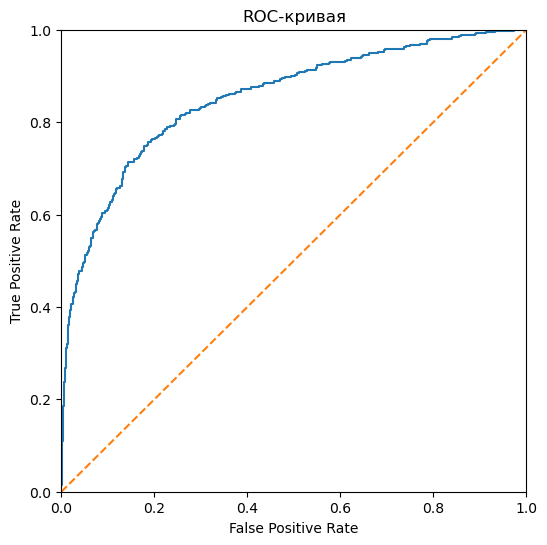

In [33]:
model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=70)
model_name = 'RFC'+'_depth'+str('9')+'_est'+str('70')+'_threshold'+str(threshold)
## Обучаем модель и предсказываем
model.fit(features_train_upsampled, target_train_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]  

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)# < напишите код здесь >

# < построим график >
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

На графике также видим, что кривая довольно выпуклая, значит площадь под ней большая и это объясняет высокое численное значение метрики (т.к. оно и говорит и площади под кривой). Кривая находится гораздо выше чем кривая случайной модели (красным), а значит, модель хорошего качества.

### Оценим важность фичей 

Рассмотрим какие метрики сильнее всего повлияли на успешность нашей полученной модели леса.

age                  0.342922
num_of_products      0.206373
balance              0.109133
is_active_member     0.067922
estimated_salary     0.066088
credit_score         0.064263
geography_Germany    0.059499
tenure               0.038227
gender_Male          0.028743
has_cr_card          0.009684
geography_Spain      0.007146
dtype: float64


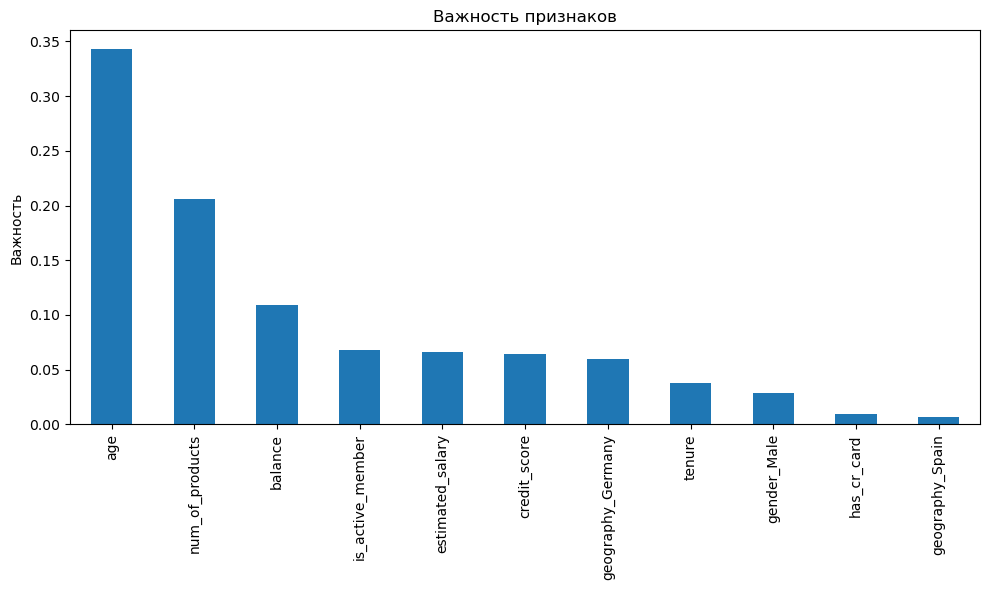

In [34]:
model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=70)
model.fit(features_train_upsampled, target_train_upsampled)

feature_importance = pd.Series(model.feature_importances_,
                         features_train_upsampled.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
feature_importance.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

print(feature_importance)

Сильнее всего повлиял возраст, количество продуктов и баланс. Это подтверждает исходные догадки в начале анализа, где мы визуально наблюдали корреляцию ухода клиентов от возраста (40-60лет) и количества продуктов (>=3).
Наименее важными оказались признаки: наличие кредитной карты и проживание в Испании.

## Общий вывод

<br>Перед началом исследования стояла цель: спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 
<br>Были предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

<br>**В ходе подготовки данных было сделано:**
- были загружены файл csv с источника Kaggle, файл был распакован, передан на сервер и затем загружен в JupiterNotebook
- в ходе исследовательского анализа были скорректированы именования колонок, были удалены лишние колонки (RowNumber, CustomerId, Surname)
- категориальные признаки (geography, gender) были закодированы методом One-Hot-Encoding, т.к. этот метод подходит и для деревьев/леса, и для логистической регрессии
- количественные признаки ('credit_score', 'age', 'tenure', 'balance','num_of_products','estimated_salary') были масштабированы с помощью StandardScaler

<br>**Первичный исследовательский анализ показал:**
- корреляции между различными признаками/feature в данных не наблюдается. Но можно отследить некоторые корреляции к целевому признаку (оранжевым-ушедшие клиенты).
- количество ушедших клиентов в 4 раза меньше (20% и 80%), чем оставшихся - явно есть дисбаланс классов.
- чаще всего уходят клиенты в возрасте от 40 до 60 лет
- чаще всего уходят клиенты, имеющие 3-4 продукта (с 4 продуктами ушли практически все клиенты, судя по графикам)
- уход клиентов напрямую не коррелирует с наличием кредитной карты, сроком обслуживания в банке, балансом или зарплатой. С кредитным рейтингом в целом корреляция не наблюдается, однако клиенты с рейтингом меньше 400, как правило, уходят.

<br>**В ходе поиска модели с наилучшими показателями было сделано:**
- были рассмотрены три вида моделей с перебором гиперпараметров:
    - DecisionTreeClasissifier: перебор глубины дерева in range(2, 20)
    - RandomForestClassifier: перебор кол-ва деревьев in range(5,100) с глубиной деревьев 6 или 9
    - LogisticRegressor: перебор кол-ва итераций от in range(100,1000)
- аналогичные поиски моделей были проведены дополнительно с использованием техник балансировки классов:
    - взвешивание классов - гиперпараметр class_weight = 'balanced'
    - Upsampling - увеличение положительного класса до размера отрицательного
    - Downsampling - уменьшение отрицательного класса до размера положительного
- дополнительно был проведен эксперимент по изменению порогов для лучшей из найденных моделей

<br>Для каждой из моделей были рассчитаны следующие метрики: accuracy, recall, precision, f1, roc_auc. Все метрики по всем моделям сохранены в таблице models_results - можно проводить дополнительные исследования по изменению каждой метрики.
<br>Наилучшая из найденных моделей - модель случайного леса с глубиной 9 и 70деревьями, с апсэмплированным набором входных данных.
<br>Максимальное значение F1 на валидационной выборке - 0.63

<br>**Тестирование модели:**
- обучающая и валидационная выборки были объединены для наиболее эффективного обучения модели перед тестированием
- тестирование модели показало следующие результаты:
    - accuracy = 0.812
    - recall = 0.6926
    - precision = 0.5435
    - **f1 = 0.6091**
    - roc_auc = 0.8554
- также был построен график ROC-кривой, на котором видно, что кривая сильно выше, чем кривая случайной модели, что говорит о высоком качестве полученной модели случайного леса.

<br>**Оценка важности признаков:**
<br>Оценка важности признаков показала, что сильнее всего влияют возраст, колиество продуктов клиента и баланс:
- age                  0.342922
- num_of_products      0.206373
- balance              0.109133
- is_active_member     0.067922
- estimated_salary     0.066088
- credit_score         0.064263
- geography_Germany    0.059499
- tenure               0.038227
- gender_Male          0.028743
- has_cr_card          0.009684
- geography_Spain      0.007146


